# Aprendizaje Automático Aplicado

## Clasificación KNN, Iris data set.

Utilizamos el conjunto de datos de flores Iris. Se entrenará un modelo de clasificación en KNN con scikit-learn y se evaluará su rendimiento en un conjunto de datos de prueba bajo diferentes % de separaciones de train y de test. Visualizaremos los resultados de la clasificación de las distintas particiones utilizando matplotlib.

### Análisis estadístico, generación y evaluación del modelo

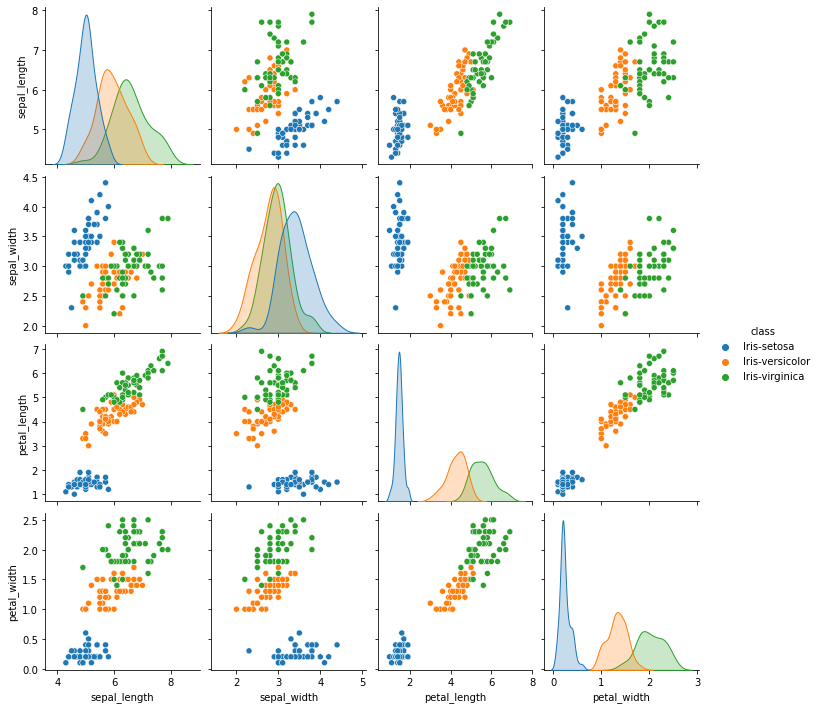

Test size: 0.1 - Accuracy: 0.93
Test size: 0.2 - Accuracy: 0.97
Test size: 0.3 - Accuracy: 0.91
Test size: 0.4 - Accuracy: 0.95
Test size: 0.5 - Accuracy: 0.99


In [6]:
# Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Descargamos el conjunto de datos en pandas
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Anális estadístico del dataset
sns.pairplot(df, hue='class')
plt.show()

# Dividimos el conjunto de datos en características y etiquetas
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividimos los datos en entrenamiento y prueba con diferentes tasas
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Entrenamos el modelo KNN con los datos de entrenamiento
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    # Realizamos las predicciones con los datos de entrenamiento y prueba
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    
    # Evalúamos el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test size: {test_size} - Accuracy: {accuracy:.2f}")

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Entrenamos el modelo KNN con los datos de entrenamiento
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)


### Gráficación de los modelos

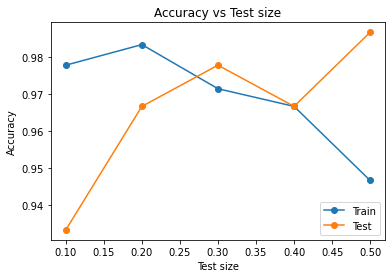

In [9]:
accuracies_train = []
accuracies_test = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Entrena el modelo KNN con los datos de entrenamiento
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)
    
    # Realiza las predicciones con los datos de entrenamiento y prueba
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    # Evalúa el rendimiento del modelo en entrenamiento y prueba
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)

# Grafica los resultados
plt.plot(test_sizes, accuracies_train, '-o', label='Train')
plt.plot(test_sizes, accuracies_test, '-o', label='Test')
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test size')
plt.legend()
plt.show()

### Entrenamiento del modelo modificando parámetros

('N_neighbors' y tipo de 'Weights')

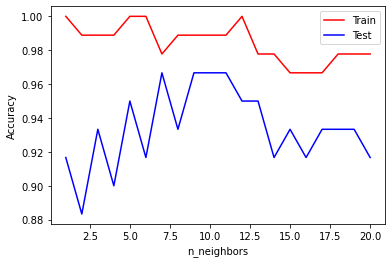

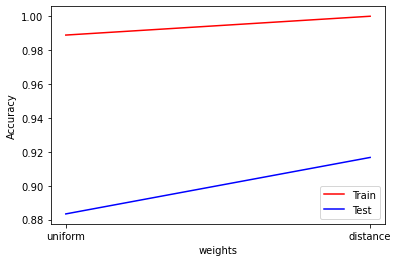

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Descargar el conjunto de datos de iris
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Dividir el conjunto de datos en entrenamiento y pruebas
X = df.iloc[:, :4]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Inicializar las listas para almacenar los resultados de precisión
train_scores_n = []
test_scores_n = []
train_scores_w = []
test_scores_w = []

# Parámetros que se variarán en el modelo KNN
n_neighbors_range = range(1, 21)
weights = ['uniform', 'distance']

for n in n_neighbors_range:
    # Crear el modelo KNN con peso uniforme
    knn = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    knn.fit(X_train, y_train)

    # Evaluar el modelo en entrenamiento y pruebas
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores_n.append(train_score)
    test_scores_n.append(test_score)

for weight in weights:
    # Crear el modelo KNN con n_neighbors=5
    knn = KNeighborsClassifier(n_neighbors=2, weights=weight)
    knn.fit(X_train, y_train)

    # Evaluar el modelo en entrenamiento y pruebas
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores_w.append(train_score)
    test_scores_w.append(test_score)

# Graficar el impacto de n_neighbors en la precisión del modelo KNN
plt.plot(n_neighbors_range, train_scores_n, 'r', label='Train')
plt.plot(n_neighbors_range, test_scores_n, 'b', label='Test')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Graficar el impacto de weight en la precisión del modelo KNN
plt.plot(weights, train_scores_w, 'r', label='Train')
plt.plot(weights, test_scores_w, 'b', label='Test')
plt.xlabel('weights')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
